In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedShuffleSplit 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
import category_encoders as ce

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.linear_model import  Lars, OrthogonalMatchingPursuit, SGDRegressor, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_percentage_error

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

from sklearn.feature_selection  import RFE
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from collections import defaultdict

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import PowerTransformer

### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = 'train_house_A.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test_house_A.csv' # содержит только имя файла, без имен папок

In [6]:
a = list(['0', '5', '15', '11', '14', '12', '3', '2', '13', '10', '7'])
a

['0', '5', '15', '11', '14', '12', '3', '2', '13', '10', '7']

In [7]:
df = pd.read_csv(path_train)
X_test = pd.read_csv(path_test)

df.drop_duplicates(inplace=True)


y_train = df.iloc[:,0]
X_train = df.iloc[:,1:] 

X_train = df[a]
X_test = X_test[a]


pt = PowerTransformer(standardize = False).set_output(transform='pandas') # обратите внимание, что меняет опция  standardize
X_train_pt = pt.fit_transform(X_train)
X_test_pt  = pt.transform(X_test)

In [8]:
X_test

,0,5,15,11,14,12,3,2,13,10,7
0,0.405623,-0.734539,0.049502,0.255438,0.294621,2.532024,1.196496,0.931702,-0.805741,1.552470,-0.570187
1,0.405623,1.361397,1.444125,0.107786,-0.634672,0.224410,-1.263275,0.788580,1.517692,-0.024866,3.413810
2,-2.465344,-0.734539,-0.899863,-1.582600,-0.929597,0.224410,-1.127236,0.384500,-0.805741,-0.024866,-0.570187
3,0.405623,1.361397,-1.057211,-0.500820,-0.754375,-0.929397,-1.519809,0.642224,-0.805741,-1.536561,-0.570187
4,0.405623,-0.734539,-1.129960,0.065220,0.628778,-0.929397,-0.943795,0.348662,1.517692,0.222511,-0.570187
...,...,...,...,...,...,...,...,...,...,...,...
132,0.405623,-0.734539,1.460855,-0.435154,-0.725904,2.532024,-1.153273,0.037632,0.355976,1.346730,1.421812
133,-2.465344,-0.734539,1.443726,-0.276937,-1.248529,-0.929397,0.471874,0.458546,0.355976,0.068207,-0.570187
134,0.405623,-0.734539,1.609417,-0.832702,0.575127,-0.929397,-1.760731,-0.525244,-0.805741,-0.651881,-0.570187
135,0.405623,-0.734539,-0.027345,1.698161,-0.149375,0.224410,-0.642180,-0.861678,0.355976,-0.024866,-0.570187


In [9]:
# Блок(и) обучения и поверки модели

In [10]:
forest = RandomForestRegressor(n_estimators=500, random_state=42)
forest.fit(X_train_pt, y_train)
y_pred_train = forest.predict(X_train_pt)
y_pred = forest.predict(X_test_pt)

In [11]:
# Блок предсказания с использованием тестового набора

In [12]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict =y_pred

(137,) (137,)
Отрицательные цены -  0
Max Error: 7,002,557
 
----------------------
   MAPE Error: 21.75
----------------------


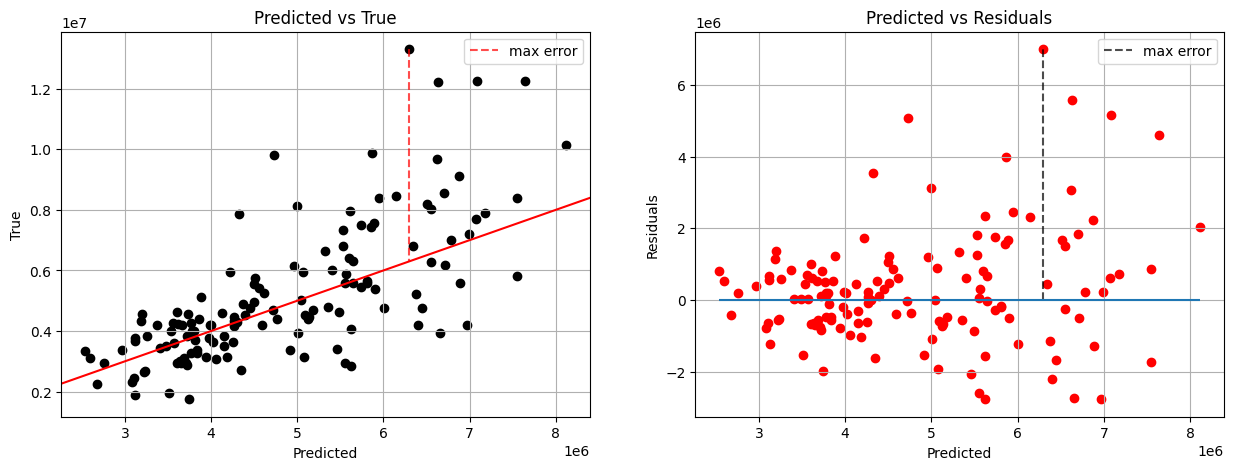

In [13]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_A.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [15]:
mask = a

import pickle
with open('saved_dictionary_a.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,1,1
1,16,airconditioning
2,6,area
3,4,area bathrooms
4,25,area bedrooms
5,10,area stories
6,5,basement
7,7,bathrooms
8,28,bathrooms stories
9,21,bedrooms
